In [60]:
import numpy as np
import matplotlib.pyplot as plt
import sys


"""
Implement the different exploration strategies.

  * mab is a MAB (MultiArmedBandit) object as defined below
  * epsilon is a scalar, which influences the amount of random actions
  * schedule is a callable decaying epsilon

You can get the approximated Q-values via mab.bandit_q_values and the different
counters for the bandits via mab.bandit_counters. mab.no_actions gives you the number
of arms.
"""

In [135]:
def epsilon_greedy(mab, epsilon):
    # 1-epsilon: exploitation => arg max Qt(a)
    # epsilon: exploration => random(a)
    action_exploit = np.argmax(mab.bandit_q_values)
    action_explore = random(mab)
    if (1-epsilon >= epsilon): # if equal, save explore for another day.
        return action_exploit
    else:
        return action_explore
#     raise NotImplementedError()

In [147]:
def decaying_epsilon_greedy(mab, epsilon_init, schedule):
#     raise NotImplementedError()
    epsilon_t = schedule(mab, epsilon_init)
    return epsilon_greedy(mab, epsilon_t) 

In [148]:
def random(mab):
    N = mab.no_actions
    action = (int) (np.random.randint(0, N, size = 1))
#     raise NotImplementedError()
    print("action: ",(int) (action))
    return action

In [149]:
def ucb(mab, c):
    raise NotImplementedError()

In [150]:
def softmax(mab, tau):
    softmax_mab = np.exp(mab.bandit_q_values/tau)/np.sum(np.exp(mab.bandit_q_values/tau))
    action = np.argmax(softmax_mab)
#     raise NotImplementedError()
    return action

In [151]:
class Bandit:
    def __init__(self, bias, q_value=0, counter=0):
        self.bias = bias
        self.q_value = q_value
        self.counter = counter

    def pull(self):
        self.counter += 1
        reward = np.clip(self.bias + np.random.uniform(), 0, 1)
        self.q_value = self.q_value + 1/self.counter * (reward - self.q_value)
        return reward

In [152]:
class MAB:
    def __init__(self, best_action, *bandits):
        self.bandits = bandits
        self._no_actions = len(bandits)
        self.step_counter = 0
        self.best_action = best_action

    def pull(self, action):
        self.step_counter += 1
        return self.bandits[action].pull(), self.bandits[action].q_value

    def run(self, no_rounds, exploration_strategy, **strategy_parameters):
        regrets = []
        rewards = []
        for i in range(no_rounds):
            if (i + 1) % 100 == 0:
                print("\rRound {}/{}".format(i + 1, no_rounds), end="")
                sys.stdout.flush()
            action = exploration_strategy(self, **strategy_parameters)
            reward, q = self.pull(action)
            best_action_value = self.best_action(self)[1]
            regret = best_action_value - q
            regrets.append(regret)
            rewards.append(reward)
        return regrets, rewards
    # counter of times each bandit was pulled in bandits
    @property
    def bandit_counters(self):
        return np.array([bandit.counter for bandit in self.bandits])
    # record of q-values of  each bandit.
    @property
    def bandit_q_values(self):
        return np.array([bandit.q_value for bandit in self.bandits])
    # returns number of available arms.
    @property
    def no_actions(self):
        return self._no_actions

In [153]:
def plot(regrets):
    for strategy, regret in regrets.items():
        total_regret = np.cumsum(regret)
        plt.ylabel('Total Regret')
        plt.xlabel('Rounds')
        plt.plot(np.arange(len(total_regret)), total_regret, label=strategy)
    plt.legend()
    plt.savefig('regret.pdf', bbox_inches='tight')

epsilon_greedy
action:  2
action:  4
action:  5
action:  0
action:  9
action:  2
action:  4
action:  3
action:  4
action:  9
action:  8
action:  8
action:  0
action:  5
action:  5
action:  8
action:  6
action:  0
action:  5
action:  6
action:  7
action:  7
action:  5
action:  9
action:  1
action:  3
action:  3
action:  2
action:  7
action:  3
action:  5
action:  2
action:  0
action:  7
action:  7
action:  9
action:  4
action:  3
action:  9
action:  3
action:  9
action:  8
action:  3
action:  2
action:  1
action:  8
action:  4
action:  0
action:  6
action:  7
action:  6
action:  2
action:  3
action:  7
action:  9
action:  0
action:  3
action:  9
action:  6
action:  5
action:  7
action:  0
action:  7
action:  3
action:  0
action:  0
action:  2
action:  7
action:  3
action:  3
action:  1
action:  2
action:  5
action:  5
action:  0
action:  3
action:  9
action:  8
action:  2
action:  8
action:  5
action:  9
action:  9
action:  4
action:  6
action:  2
action:  0
action:  9
action:  8
action

Round 800/1000action:  9
action:  2
action:  2
action:  7
action:  9
action:  0
action:  8
action:  1
action:  7
action:  2
action:  8
action:  6
action:  1
action:  0
action:  9
action:  5
action:  1
action:  9
action:  3
action:  8
action:  6
action:  8
action:  6
action:  5
action:  3
action:  8
action:  9
action:  8
action:  4
action:  3
action:  6
action:  5
action:  1
action:  2
action:  5
action:  4
action:  3
action:  7
action:  2
action:  7
action:  7
action:  2
action:  2
action:  7
action:  7
action:  8
action:  5
action:  6
action:  8
action:  2
action:  2
action:  9
action:  7
action:  5
action:  5
action:  6
action:  7
action:  7
action:  9
action:  5
action:  0
action:  3
action:  5
action:  4
action:  8
action:  1
action:  2
action:  7
action:  1
action:  8
action:  2
action:  0
action:  0
action:  6
action:  4
action:  8
action:  5
action:  6
action:  3
action:  2
action:  0
action:  5
action:  6
action:  3
action:  9
action:  0
action:  4
action:  4
action:  6
action:

action:  4
epsilon_t:  0.4824
action:  5
epsilon_t:  0.48179999999999995
action:  4
epsilon_t:  0.4812
action:  8
Round 200/1000epsilon_t:  0.4805999999999999
action:  2
epsilon_t:  0.48
action:  5
epsilon_t:  0.47939999999999994
action:  6
epsilon_t:  0.4788
action:  0
epsilon_t:  0.47819999999999996
action:  4
epsilon_t:  0.4776
action:  1
epsilon_t:  0.477
action:  3
epsilon_t:  0.4764
action:  1
epsilon_t:  0.4758
action:  6
epsilon_t:  0.4752
action:  0
epsilon_t:  0.4746
action:  7
epsilon_t:  0.474
action:  3
epsilon_t:  0.4734
action:  6
epsilon_t:  0.4728
action:  4
epsilon_t:  0.4722
action:  2
epsilon_t:  0.4716
action:  3
epsilon_t:  0.471
action:  1
epsilon_t:  0.4704
action:  3
epsilon_t:  0.4698
action:  3
epsilon_t:  0.4692
action:  2
epsilon_t:  0.4686
action:  4
epsilon_t:  0.46799999999999997
action:  8
epsilon_t:  0.4674
action:  0
epsilon_t:  0.4668
action:  8
epsilon_t:  0.4662
action:  7
epsilon_t:  0.4656
action:  7
epsilon_t:  0.46499999999999997
action:  5
eps

action:  9
epsilon_t:  0.33899999999999997
action:  9
epsilon_t:  0.33840000000000003
action:  9
epsilon_t:  0.33779999999999993
action:  9
epsilon_t:  0.3372
action:  2
epsilon_t:  0.33659999999999995
action:  4
epsilon_t:  0.336
action:  5
epsilon_t:  0.3354
action:  0
epsilon_t:  0.33480000000000004
action:  1
epsilon_t:  0.33419999999999994
action:  8
epsilon_t:  0.3336
action:  4
epsilon_t:  0.33299999999999996
action:  3
epsilon_t:  0.33240000000000003
action:  9
epsilon_t:  0.33179999999999993
action:  6
epsilon_t:  0.3312
action:  2
epsilon_t:  0.33059999999999995
action:  0
epsilon_t:  0.33
action:  9
epsilon_t:  0.32939999999999997
action:  4
epsilon_t:  0.32880000000000004
action:  3
epsilon_t:  0.32819999999999994
action:  0
epsilon_t:  0.3276
action:  4
epsilon_t:  0.32699999999999996
action:  4
epsilon_t:  0.3264
action:  4
epsilon_t:  0.3257999999999999
action:  8
epsilon_t:  0.3252
action:  0
epsilon_t:  0.32459999999999994
action:  8
epsilon_t:  0.324
action:  2
epsilo

action:  3
epsilon_t:  0.18839999999999996
action:  2
epsilon_t:  0.18779999999999997
action:  6
epsilon_t:  0.18720000000000003
action:  3
epsilon_t:  0.18660000000000002
action:  6
epsilon_t:  0.18600000000000003
action:  1
epsilon_t:  0.18540000000000004
action:  6
epsilon_t:  0.18480000000000002
action:  3
epsilon_t:  0.18420000000000003
action:  2
epsilon_t:  0.1836
action:  9
epsilon_t:  0.18300000000000002
action:  4
epsilon_t:  0.18240000000000003
action:  0
epsilon_t:  0.18180000000000002
action:  6
epsilon_t:  0.18120000000000003
action:  2
Round 700/1000epsilon_t:  0.1806
action:  2
epsilon_t:  0.18000000000000002
action:  8
epsilon_t:  0.17940000000000003
action:  9
epsilon_t:  0.17880000000000001
action:  5
epsilon_t:  0.17820000000000003
action:  6
epsilon_t:  0.1776
action:  7
epsilon_t:  0.17700000000000002
action:  2
epsilon_t:  0.17640000000000003
action:  8
epsilon_t:  0.1758
action:  3
epsilon_t:  0.17520000000000002
action:  1
epsilon_t:  0.1746
action:  8
epsilon_

action:  5
epsilon_t:  0.03540000000000003
action:  6
epsilon_t:  0.03480000000000003
action:  4
epsilon_t:  0.03420000000000003
action:  9
epsilon_t:  0.033600000000000026
action:  4
epsilon_t:  0.03300000000000003
action:  2
epsilon_t:  0.032400000000000026
action:  5
epsilon_t:  0.03180000000000003
action:  3
epsilon_t:  0.031200000000000026
action:  2
epsilon_t:  0.030600000000000026
action:  9
epsilon_t:  0.030000000000000027
action:  0
epsilon_t:  0.029400000000000023
action:  4
epsilon_t:  0.028800000000000023
action:  7
epsilon_t:  0.028200000000000024
action:  9
epsilon_t:  0.027600000000000024
action:  8
epsilon_t:  0.027000000000000024
action:  6
epsilon_t:  0.026400000000000024
action:  4
epsilon_t:  0.02580000000000002
action:  6
epsilon_t:  0.02520000000000002
action:  3
epsilon_t:  0.02460000000000002
action:  0
epsilon_t:  0.02400000000000002
action:  0
epsilon_t:  0.02340000000000002
action:  3
epsilon_t:  0.022800000000000018
action:  4
epsilon_t:  0.02220000000000002

action:  2
action:  6
action:  1
action:  9
action:  7
action:  2
action:  4
action:  7
action:  2
action:  1
action:  7
action:  0
action:  8
action:  4
action:  4
action:  2
action:  3
action:  4
action:  3
action:  4
action:  2
action:  3
action:  3
action:  1
action:  8
action:  8
action:  8
action:  6
action:  7
action:  7
action:  6
action:  0
action:  4
action:  4
action:  1
action:  0
action:  8
action:  0
action:  1
action:  0
action:  4
action:  6
action:  0
action:  1
action:  9
action:  6
action:  8
action:  0
action:  4
action:  3
action:  3
action:  2
action:  8
action:  7
action:  6
action:  4
action:  1
action:  5
action:  9
action:  8
action:  2
action:  8
action:  6
action:  1
action:  3
action:  8
action:  3
action:  6
action:  7
action:  7
action:  7
action:  3
action:  4
action:  9
action:  4
action:  9
action:  8
action:  9
action:  6
action:  8
action:  9
action:  5
action:  2
action:  4
action:  8
action:  7
action:  3
Round 600/1000action:  8
action:  2
action:

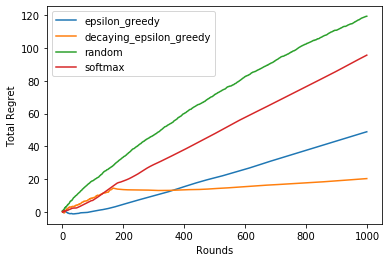

In [155]:
if __name__ == '__main__':
#     no_rounds = 1000000
    no_rounds = 1000
    def schedule(mab, epsilon_init):
        curr_rounds = np.sum(mab.bandit_counters)
        epsilon_t = (1 - curr_rounds/no_rounds)*epsilon_init
        return epsilon_t

    epsilon = 0.5
    epsilon_init = 0.6
    tau = 0.01
    c = 1.0

    strategies = {
        epsilon_greedy: {'epsilon': epsilon},
        decaying_epsilon_greedy: {'epsilon_init': epsilon_init, 'schedule': schedule},
        random: {},
#         ucb: {'c': c},
        softmax: {'tau': tau}
    }

    average_total_returns = {}
    total_regrets = {}
    num_actions = 10
    biases = [1.0 / k for k in range(5, 5+num_actions)]
    best_action_index = 0
    best_action_value = 0.7
    def best_action(mab):
        return best_action_index, best_action_value
    for strategy, parameters in strategies.items():
        print(strategy.__name__)
        bandits = [Bandit(bias, 1-bias) for bias in biases]
        mab = MAB(best_action, *bandits)
        total_regret, average_total_return = mab.run(no_rounds, strategy, **parameters)
        print("\n")
        average_total_returns[strategy.__name__] = average_total_return
        total_regrets[strategy.__name__] = total_regret
    plot(total_regrets)